In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import layers,models

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

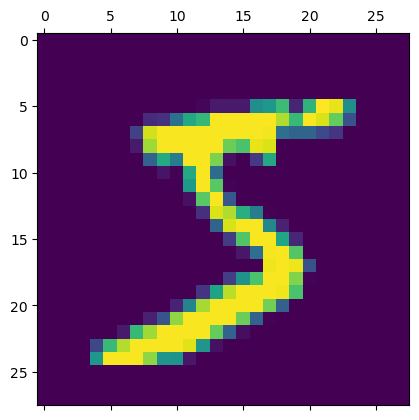

In [5]:
plt.matshow(X_train[0])

In [6]:
#scaling the data

X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 13ms/step - loss: 0.4672 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2733 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2664 - accuracy: 0.9264


In [9]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 5s 12ms/step - loss: 0.2647 - accuracy: 0.9275


[0.26466673612594604, 0.9275000095367432]

In [10]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 4s 12ms/step


array([1.8993150e-02, 2.2428317e-07, 8.1437744e-02, 9.4581825e-01,
       2.2751593e-03, 9.0108901e-02, 1.9652659e-06, 9.9978286e-01,
       9.6897200e-02, 6.4041507e-01], dtype=float32)

In [11]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    7,  937,   15,    8,    2,   12,    9,   35,    2],
       [   4,    0,   21,  911,    0,   27,    3,   13,   23,    8],
       [   1,    1,    2,    1,  916,    0,   13,    4,   10,   34],
       [   8,    3,    1,   20,   10,  783,   16,    6,   37,    8],
       [  11,    3,    6,    1,    7,   10,  914,    2,    4,    0],
       [   1,    5,   25,    6,    8,    1,    0,  953,    4,   25],
       [   7,    7,    7,   19,    9,   19,   10,   12,  877,    7],
       [  11,    6,    1,   10,   28,    6,    0,   27,    8,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

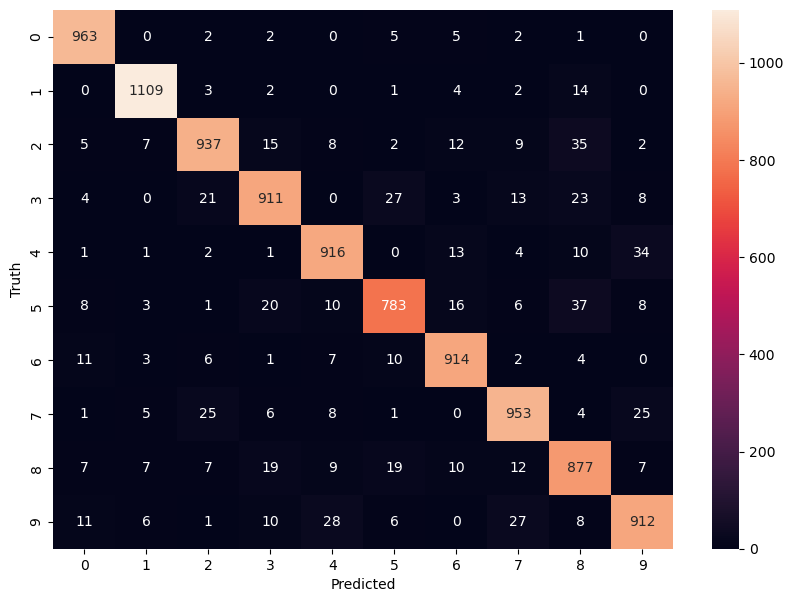

In [13]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 84s 43ms/step - loss: 0.2665 - accuracy: 0.9264
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1217 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0836 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0640 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0505 - accuracy: 0.9846


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 5s 8ms/step - loss: 0.0777 - accuracy: 0.9747


[0.07766810804605484, 0.9746999740600586]

313/313 [==============================] - 3s 10ms/step


Text(95.72222222222221, 0.5, 'Truth')

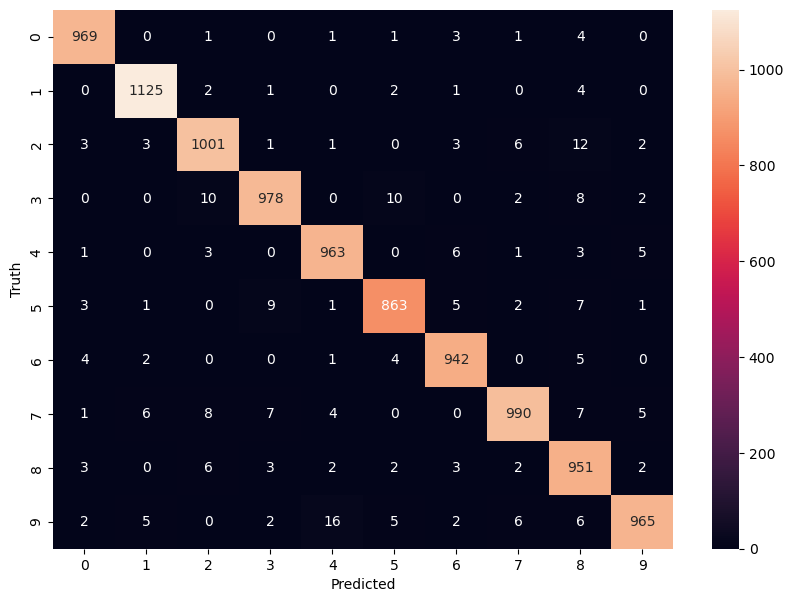

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 24ms/step - loss: 0.2806 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1257 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0863 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0654 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0417 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0333 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0270 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 1

313/313 [==============================] - 27s 77ms/step


Text(95.72222222222221, 0.5, 'Truth')

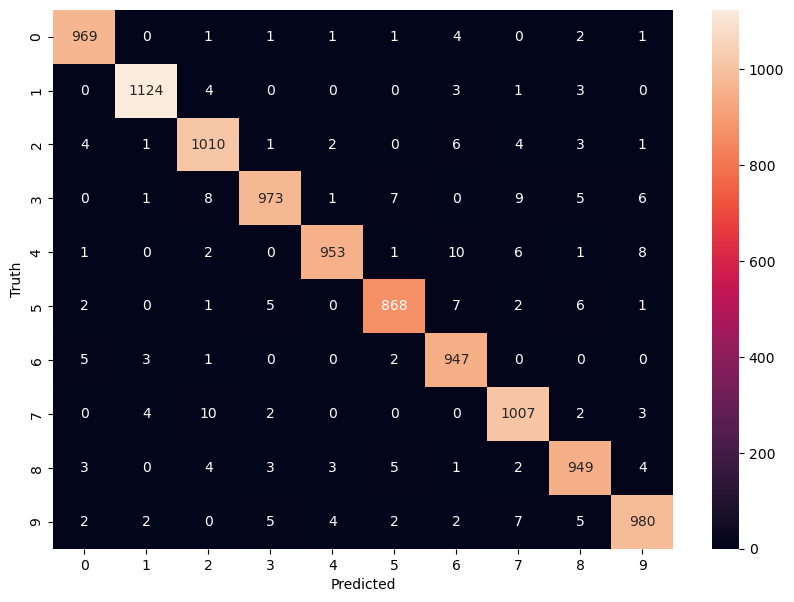

In [18]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
from sklearn.metrics import classification_report
print("classifcation report: /n",classification_report(y_test,y_predicted_labels))

classifcation report: /n               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [45]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [46]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 568s 296ms/step - loss: 0.1394 - accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 587s 313ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 570s 304ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 399s 213ms/step - loss: 0.0252 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 353s 188ms/step - loss: 0.0185 - accuracy: 0.9937


In [38]:
X_train_flattened.shape

(60000, 784)

In [47]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 113s 351ms/step - loss: 0.0289 - accuracy: 0.9918


[0.028868237510323524, 0.9918000102043152]